In [304]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse Drug Data and the Clinical Trial Data

mouse_drug_df = pd.read_csv("data/mouse_drug_data.csv",low_memory=False)
clinicaltrail_df=pd.read_csv("data/clinicaltrial_data.csv",low_memory=False)

# Combine the data into a single dataset
# by "Mouse ID"
combined_data = pd.merge(mouse_drug_df,clinicaltrail_df,on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [305]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
group_data = combined_data.groupby(["Drug","Timepoint"])

# Convert to DataFrame
mean_tumor_volumn=pd.DataFrame(group_data["Tumor Volume (mm3)"].mean())

# Preview DataFrame
mean_tumor_volumn.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [306]:
#reset index to make better formate and assign it to new table
mean_tumor_volumn_p = mean_tumor_volumn.reset_index()
mean_tumor_volumn_p.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [307]:
#like pivot table, use "index" as row, colums as columns, values as value to transform as below
p1=mean_tumor_volumn_p.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
p1

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [308]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_tumor_volumn=pd.DataFrame(group_data["Tumor Volume (mm3)"].std())

# Convert to DataFrame
# Preview DataFrame
std_tumor_volumn.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    2.242964
          10                   3.513422
          15                   4.108369
          20                   4.362915

In [309]:
#reset index to make better formate and assign it to new table
std_tumor_volumn_p = std_tumor_volumn.reset_index()

In [310]:
std_tumor_volumn_p.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,2.242964
2,Capomulin,10,3.513422
3,Capomulin,15,4.108369
4,Capomulin,20,4.362915


In [311]:
#like pivot table, use "index" as row, colums as columns, values as value to transform as below
p2=std_tumor_volumn_p.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
p2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.242964,0.753856,1.175512,1.270025,0.970606,1.068422,1.158540,2.414777,1.199312,0.925664
10,3.513422,1.056070,1.293872,1.676454,1.463744,1.969702,1.804167,3.528366,2.079848,1.238033
15,4.108369,1.447385,1.639210,2.529329,2.036395,2.747955,1.921818,3.774331,2.365597,1.698048
20,4.362915,1.525155,2.129674,3.166670,2.662084,3.659772,2.289070,3.770480,2.849853,2.198367
25,4.135268,1.864031,2.334787,3.292768,3.452264,4.266887,2.160438,3.582445,3.233965,2.410052
30,4.383004,1.962481,2.601931,3.963139,3.778081,4.718189,2.689902,4.147942,3.816460,3.098552
35,4.935447,2.590153,3.409213,4.650315,3.926309,4.817311,3.430847,4.433337,4.012745,3.297993
40,5.607278,2.650983,3.336898,4.486653,4.332193,4.748016,4.694337,5.046561,4.885891,3.736102


In [312]:
samples = ['Capomulin','Infubinol','Ketapril','Placebo']

Tumer_Volumne = p1[samples]
Tumer_Volumne.reset_index(inplace = True)
Tumer_Volumne

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


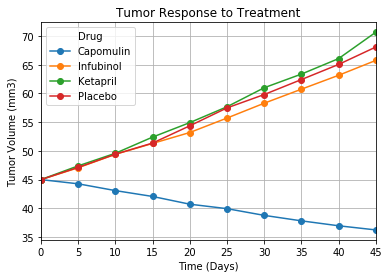

In [313]:
tumor_plot = Tumer_Volumne.plot(kind = 'line', x = 'Timepoint',y=samples,title="Tumor Response to Treatment", marker = "o")
tumor_plot.set_xlabel("Time (Days)")
tumor_plot.set_ylabel("Tumor Volume (mm3)")
plt.grid()
plt.savefig("Tumor Response to Treatment.png")
plt.show()

## Metastatic Response to Treatment

In [314]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metsite_df=pd.DataFrame(group_data["Metastatic Sites"].mean())
# Convert to DataFrame
mean_metsite_df.head()
# Preview DataFrame
mean_metsite_p = mean_metsite_df.reset_index()
mean_metsite_p.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [315]:
p3=mean_metsite_p.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
p3

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [316]:
Metastatic_Sites = p3[samples]
Metastatic_Sites.reset_index(inplace = True)
Metastatic_Sites

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


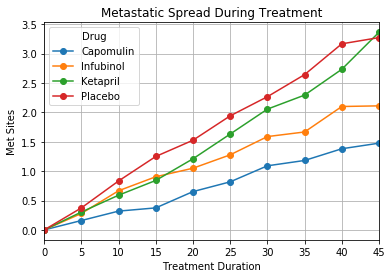

In [317]:
meta_plot = Metastatic_Sites.plot(kind = 'line', x = 'Timepoint',y=samples,title="Metastatic Spread During Treatment", marker = "o")
meta_plot.set_xlabel("Treatment Duration")
meta_plot.set_ylabel("Met Sites")
plt.grid()
plt.savefig("Metastatic Spread During Treatment.png")
plt.show()

## Survival Rates

In [318]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_counts = group_data.count()['Mouse ID']

# Convert to DataFrame
mice_counts_df = pd.DataFrame({"Mouse Count": mice_counts})

# Preview DataFrame
mice_counts_df.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [319]:
mice_counts_df_p = mice_counts_df.reset_index()
mice_counts_df_p.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [320]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
p4=mice_counts_df_p.pivot(index = 'Timepoint', columns = 'Drug', values = 'Mouse Count')
p4


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [321]:
micecount = p4[samples]
micecount.reset_index(inplace = True)
micecount

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


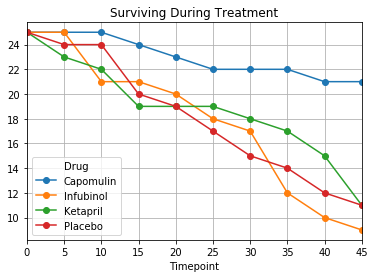

In [322]:
mice_plot = micecount.plot(kind = 'line', x = 'Timepoint',y=samples,title="Surviving During Treatment", marker = "o")
meta_plot.set_xlabel("Time (Days)")
meta_plot.set_ylabel("Survival Rate (%)")
plt.grid()
plt.savefig("Surviving During Treatment.png")
plt.show()

# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

###
Hi Sunil or Laurel, Unfortunally I could not figure out the last question.
Sorry I did not have too much time to ask around and do the reseach but I will learn from the solution after you post it!!!!